In [1]:
import os
import os.path
import pandas as pd
import mysql.connector
import sqlalchemy
from sqlalchemy import create_engine
import datetime
import pickle
import logging
from slugify import slugify
import requests
import glob

BASE_DIR = os.path.expanduser('~')+"/Heatseek/"

try:
    os.stat(BASE_DIR)
except:
    os.mkdir(BASE_DIR)

LOG_FILE = BASE_DIR+'db_import.log'

logging.basicConfig(format= '[%(asctime)s] {%(pathname)s:%(lineno)d} %(levelname)s - %(message)s',
    datefmt='%H:%M:%S',
    filename=LOG_FILE, 
    level=logging.INFO)

log = logging.getLogger(__name__)
print "This notebook will log to {}".format(LOG_FILE)
log.info("This notebook will log to {}".format(LOG_FILE))

This notebook will log to /Users/jfreeley/Heatseek/db_import.log


In [2]:
import os
import mysql.connector
from sqlalchemy import create_engine

user = os.environ['MYSQL_USER']
host = os.environ['MYSQL_HOST']
pw = os.environ['MYSQL_PASSWORD']
db = os.environ['MYSQL_DATABASE']

user = 'root'
host = 'localhost'
pw = ''
db = 'heatseek'

conn_str = "mysql+mysqlconnector://{0}:{1}@{2}/{3}".format(user, pw, host, db)
engine = create_engine(conn_str, echo=False)

In [3]:
df = pd.read_sql('select * from bad_buildings', con=engine )
df.shape

(306731, 75)

In [4]:
cols_to_keep = [
    'hbaddress', 
    'all_hpd_complaints',
    'hs_hpd_complaints',
    'heat_311_hpd_count',
    'all_311_hpd_count',
    'dob_violation_cnt',
    'permit_cnt',
    'hs_permit_cnt',
    'all_hpd_complaints_per_resunits',
    'hs_hpd_complaints_per_resunits',
    'heat_311_hpd_count_per_resunits',
    'all_311_hpd_count_per_resunits',
    'dob_violation_cnt_per_resunits',
    'hs_permit_cnt7_per_resunits',
    'rentstab2007_per_resunits',
    'rentstab2015_per_resunits',
    'diff_per_resunits',
    'classA_cnt_per_resunits',
    'classB_cnt_per_resunits',
    'classC_cnt_per_resunits',
    'classI_cnt_per_resunits',
    'lit_cnt_per_resunits',
    'numfloors',
    'unitsres',
    'unitstotal',
    'unitsstab2007',
    'unitsstab2015',
    'diff',
    'percentchange',
    'classA_cnt',
    'classB_cnt',
    'classC_cnt',
    'classI_cnt',
    'litigation_cnt',
    'zip', #
    'owner_name', #
    'managementprogram', #
    'target',
    'bb_target',
    'bb_score'
]

#SMOTE
#
df_features = df[cols_to_keep]
df_features.fillna(0, inplace=True)

df_features

/Applications/anaconda/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2824: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,hbaddress,all_hpd_complaints,hs_hpd_complaints,heat_311_hpd_count,all_311_hpd_count,dob_violation_cnt,permit_cnt,hs_permit_cnt,all_hpd_complaints_per_resunits,hs_hpd_complaints_per_resunits,...,classB_cnt,classC_cnt,classI_cnt,litigation_cnt,zip,owner_name,managementprogram,target,bb_target,bb_score
0,403 EAST 6 STREET MANHATTAN,6.0,4.0,0.0,2.0,0,1.0,0.0,0.8571,0.5714,...,15,6,0.0,0.0,10016,JOSH SHINE,PVT,0.0,1.0,3.428570
1,1005 1 AVENUE MANHATTAN,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0000,0.0000,...,0,0,0.0,0.0,10022,0,PVT,0.0,0.0,0.000000
2,1006 1 AVENUE MANHATTAN,2.0,2.0,2.0,2.0,4,68.0,31.0,0.0032,0.0032,...,2,0,1.0,0.0,10022,EMANUEL EDWARDS,PVT,0.0,0.0,0.015898
3,101 1 AVENUE MANHATTAN,1.0,0.0,0.0,1.0,2,0.0,0.0,0.2500,0.0000,...,34,1,3.0,0.0,10003,LISA/STEPHAN KOBYLECKYJ,PVT,0.0,1.0,9.875000
4,102 1 AVENUE MANHATTAN,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0000,0.0000,...,0,0,1.0,0.0,10009,ANDREW FARBER,PVT,0.0,0.0,1.000000
5,1026 1 AVENUE MANHATTAN,36.0,23.0,23.0,30.0,8,162.0,76.0,0.1390,0.0888,...,17,0,0.0,0.0,10022,EYAL REGGEV,PVT,0.0,0.0,0.127413
6,103 1 AVENUE MANHATTAN,0.0,0.0,0.0,1.0,2,1.0,0.0,0.0000,0.0000,...,0,0,0.0,0.0,10003,0,PVT,0.0,0.0,1.000000
7,1033 1 AVENUE MANHATTAN,0.0,0.0,0.0,0.0,100,0.0,0.0,0.0000,0.0000,...,0,0,0.0,0.0,10022,0,PVT,0.0,0.0,0.000000
8,105 1 AVENUE MANHATTAN,0.0,0.0,0.0,0.0,1,2.0,1.0,0.0000,0.0000,...,0,0,0.0,0.0,10003,LEONARD EIS,PVT,0.0,0.0,0.666667
9,1057 1 AVENUE MANHATTAN,13.0,13.0,13.0,13.0,0,4.0,2.0,0.8125,0.8125,...,0,1,0.0,0.0,10022,JANET GIAIMO VITALE,PVT,0.0,0.0,0.093750


In [5]:
df_features[df_features['bb_score'] > 0].shape

(143737, 40)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_features['enc-managementprogram'] = le.fit_transform(df_features['managementprogram'])
df_features['enc-owner_name'] = le.fit_transform(df_features['owner_name'])
df_features['enc-hbaddress'] = le.fit_transform(df_features['hbaddress'])
df_features['enc-zip'] = le.fit_transform(df_features['zip'])


/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [7]:
import math
df_features['log_bb_score'] = df_features[df_features['bb_score']> 0]['bb_score'].apply(lambda x: math.log(x))
#df_features[df_features['bb_score']> 0]['bb_score'].hist(bins=200)

/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


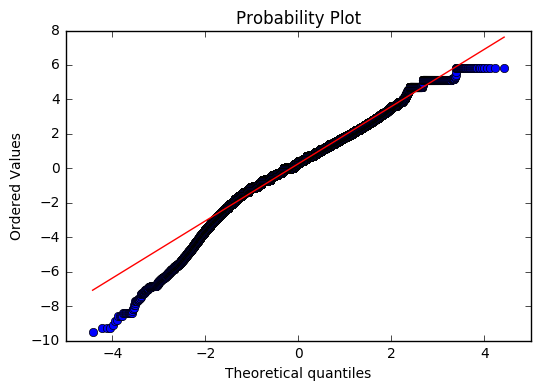

In [8]:
import numpy as np
import pylab
import scipy.stats as stats

#QQ PLOT
stats.probplot(df_features[df_features['bb_score']> 0]['bb_score'].apply(lambda x: math.log(x)), dist="norm", plot=pylab)
pylab.show()
#SOME SKEWNESS WITH THE LOG BUT STILL QUITE USABLE

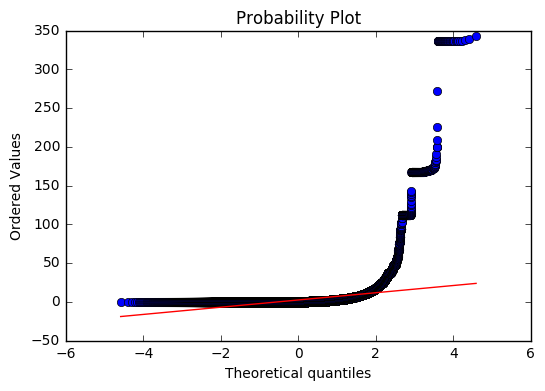

In [9]:
import numpy as np
import pylab
import scipy.stats as stats

# QQ PLOT
stats.probplot(df_features['bb_score'], dist="norm", plot=pylab)
pylab.show()

# VERY SKEWED ... CONSIDER LOG TRANSFORM
# REASON FOR USING BINARY CLASSIFICATION

In [10]:
df_features = df_features.dropna()
df_features.shape

cols_to_keep = [
    'all_hpd_complaints',
    'hs_hpd_complaints',
    'heat_311_hpd_count',
    'all_311_hpd_count',
    'permit_cnt',
    'hs_permit_cnt',
    'all_hpd_complaints_per_resunits',
    'hs_hpd_complaints_per_resunits',
    'heat_311_hpd_count_per_resunits',
    'all_311_hpd_count_per_resunits',
    'hs_permit_cnt7_per_resunits',
    'rentstab2007_per_resunits',
    'rentstab2015_per_resunits',
    'diff_per_resunits',
    'classA_cnt_per_resunits',
    'classI_cnt_per_resunits',
    'lit_cnt_per_resunits',
    'numfloors',
    'unitsstab2007',
    'unitsstab2015',
    'diff',
    'percentchange',
    'classA_cnt',
    'classI_cnt',
    'litigation_cnt',
    'enc-zip',
    'enc-hbaddress',
    'enc-owner_name',
    'enc-managementprogram'
]
X = df_features[cols_to_keep]
y = df_features['bb_target']

X.shape

(143737, 29)

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X.describe()

,all_hpd_complaints,hs_hpd_complaints,heat_311_hpd_count,all_311_hpd_count,permit_cnt,hs_permit_cnt,all_hpd_complaints_per_resunits,hs_hpd_complaints_per_resunits,heat_311_hpd_count_per_resunits,all_311_hpd_count_per_resunits,...,unitsstab2015,diff,percentchange,classA_cnt,classI_cnt,litigation_cnt,enc-zip,enc-hbaddress,enc-owner_name,enc-managementprogram
count,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,...,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000
mean,9.337,3.980,2.972,9.742,1.498,0.619,0.958,0.359,0.252,1.020,...,9.360,0.363,-2.482,2.532,0.316,0.412,112.563,152604.039,10286.168,12.951
std,39.793,22.038,23.030,45.313,5.498,2.447,3.837,1.545,1.309,4.084,...,134.342,44.437,20.818,5.780,0.741,1.318,53.170,86823.028,14517.533,0.555
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-455.000,-100.000,0.000,0.000,0.000,0.000,9.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,78.000,77836.000,0.000,13.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,120.000,154273.000,0.000,13.000
75%,4.000,1.000,1.000,4.000,0.000,0.000,0.490,0.148,0.039,0.500,...,0.000,0.000,0.000,3.000,0.000,0.000,145.000,226536.000,20496.000,13.000
max,3643.000,3544.000,4381.000,5182.000,310.000,129.000,228.500,183.000,183.833,238.000,...,8655.000,2766.000,100.000,214.000,25.000,41.000,219.000,303577.000,46820.000,13.000


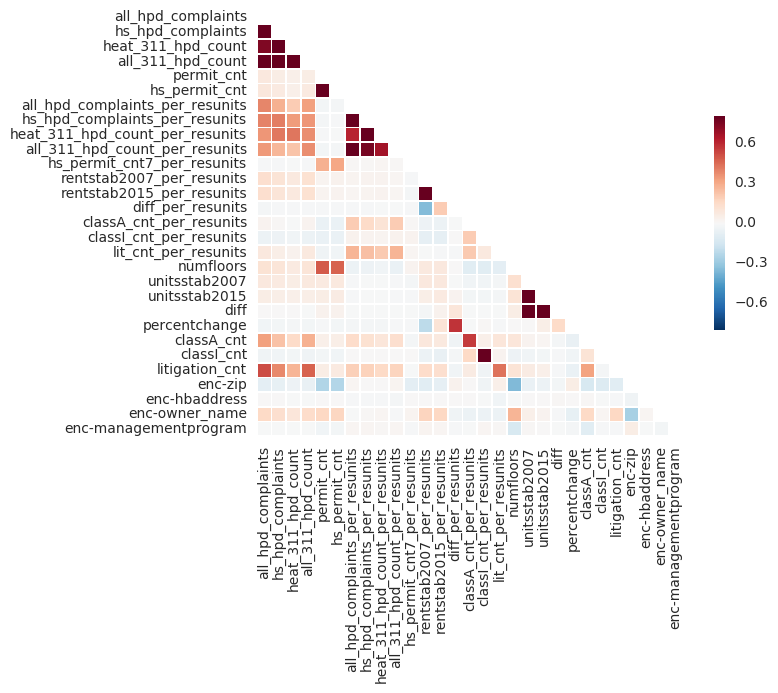

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# af_corr = X.coor()
# sns.set(style='white')
# mask  = np.zeros_like(af_corr, dtype=np.bool)
# mask(np.triu_indices_from(mask) = True)
# sns.heatmap(af_corr, mask=mask, vmax=3,sqaure=True, linewidths=.5 , char_kws={"shrink":.5})

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

af_corr = X.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(af_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(af_corr, mask=mask, vmax=.8,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
X.corr()

,all_hpd_complaints,hs_hpd_complaints,heat_311_hpd_count,all_311_hpd_count,permit_cnt,hs_permit_cnt,all_hpd_complaints_per_resunits,hs_hpd_complaints_per_resunits,heat_311_hpd_count_per_resunits,all_311_hpd_count_per_resunits,...,unitsstab2015,diff,percentchange,classA_cnt,classI_cnt,litigation_cnt,enc-zip,enc-hbaddress,enc-owner_name,enc-managementprogram
all_hpd_complaints,1.000,0.880,0.745,0.906,0.081,0.090,0.389,0.395,0.351,0.347,...,0.058,0.000,-0.028,0.330,-0.036,0.522,-0.080,0.000,0.161,-0.001
hs_hpd_complaints,0.880,1.000,0.940,0.869,0.062,0.069,0.282,0.411,0.419,0.269,...,0.054,0.005,-0.020,0.233,-0.030,0.384,-0.065,0.001,0.134,-0.002
heat_311_hpd_count,0.745,0.940,1.000,0.831,0.045,0.050,0.202,0.338,0.425,0.229,...,0.045,0.005,-0.013,0.156,-0.023,0.271,-0.041,-0.001,0.098,-0.002
all_311_hpd_count,0.906,0.869,0.831,1.000,0.062,0.070,0.326,0.353,0.373,0.370,...,0.056,-0.001,-0.023,0.284,-0.034,0.472,-0.060,-0.005,0.146,-0.004
permit_cnt,0.081,0.062,0.045,0.062,1.000,0.942,-0.019,-0.015,-0.009,-0.022,...,0.061,0.036,-0.010,0.047,-0.025,0.062,-0.243,0.000,0.164,-0.031
hs_permit_cnt,0.090,0.069,0.050,0.070,0.942,1.000,-0.013,-0.010,-0.004,-0.016,...,0.067,0.035,-0.019,0.053,-0.031,0.069,-0.236,0.003,0.170,-0.023
all_hpd_complaints_per_resunits,0.389,0.282,0.202,0.326,-0.019,-0.013,1.000,0.827,0.618,0.894,...,-0.007,-0.005,-0.014,0.149,0.006,0.189,0.015,-0.008,-0.001,0.016
hs_hpd_complaints_per_resunits,0.395,0.411,0.338,0.353,-0.015,-0.010,0.827,1.000,0.869,0.768,...,-0.005,-0.005,-0.017,0.124,0.005,0.183,0.004,-0.009,0.011,0.016
heat_311_hpd_count_per_resunits,0.351,0.419,0.425,0.373,-0.009,-0.004,0.618,0.869,1.000,0.671,...,-0.003,-0.004,-0.014,0.094,0.001,0.158,0.006,-0.011,0.014,0.011
all_311_hpd_count_per_resunits,0.347,0.269,0.229,0.370,-0.022,-0.016,0.894,0.768,0.671,1.000,...,-0.007,-0.005,-0.012,0.136,0.004,0.181,0.024,-0.013,-0.008,0.014


In [14]:
from sklearn.preprocessing import StandardScaler

X_norm =  StandardScaler().fit_transform(X);

df_stand = pd.DataFrame(X_norm, columns=X.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143737 entries, 0 to 143736
Data columns (total 29 columns):
all_hpd_complaints                 143737 non-null float64
hs_hpd_complaints                  143737 non-null float64
heat_311_hpd_count                 143737 non-null float64
all_311_hpd_count                  143737 non-null float64
permit_cnt                         143737 non-null float64
hs_permit_cnt                      143737 non-null float64
all_hpd_complaints_per_resunits    143737 non-null float64
hs_hpd_complaints_per_resunits     143737 non-null float64
heat_311_hpd_count_per_resunits    143737 non-null float64
all_311_hpd_count_per_resunits     143737 non-null float64
hs_permit_cnt7_per_resunits        143737 non-null float64
rentstab2007_per_resunits          143737 non-null float64
rentstab2015_per_resunits          143737 non-null float64
diff_per_resunits                  143737 non-null float64
classA_cnt_per_resunits            143737 non-null float64
clas

In [15]:
X_features = df_stand
y_features = y

#y_features = y_features.map(lambda x: 'no' if x ==0 else 'yes')

len(y_features)

143737

/Applications/anaconda/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Random Forest Score:	0.757 ± 0.001
Ada Boost Score:	0.777 ± 0.003
Gradient Boosting Score:	0.783 ± 0.002
Decision Tree Score:	0.714 ± 0.003


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
classA_cnt_per_resunits,0.231,0.200,0.170,0.233
enc-zip,0.118,0.100,0.121,0.098
numfloors,0.083,0.080,0.049,0.039
classI_cnt_per_resunits,0.058,0.020,0.017,0.017
lit_cnt_per_resunits,0.056,0.040,0.020,0.020
classA_cnt,0.055,0.080,0.046,0.017
hs_permit_cnt7_per_resunits,0.053,0.140,0.011,0.011
all_311_hpd_count_per_resunits,0.044,0.040,0.024,0.030
unitsstab2007,0.040,0.080,0.008,0.004
all_hpd_complaints_per_resunits,0.036,0.020,0.026,0.020


None


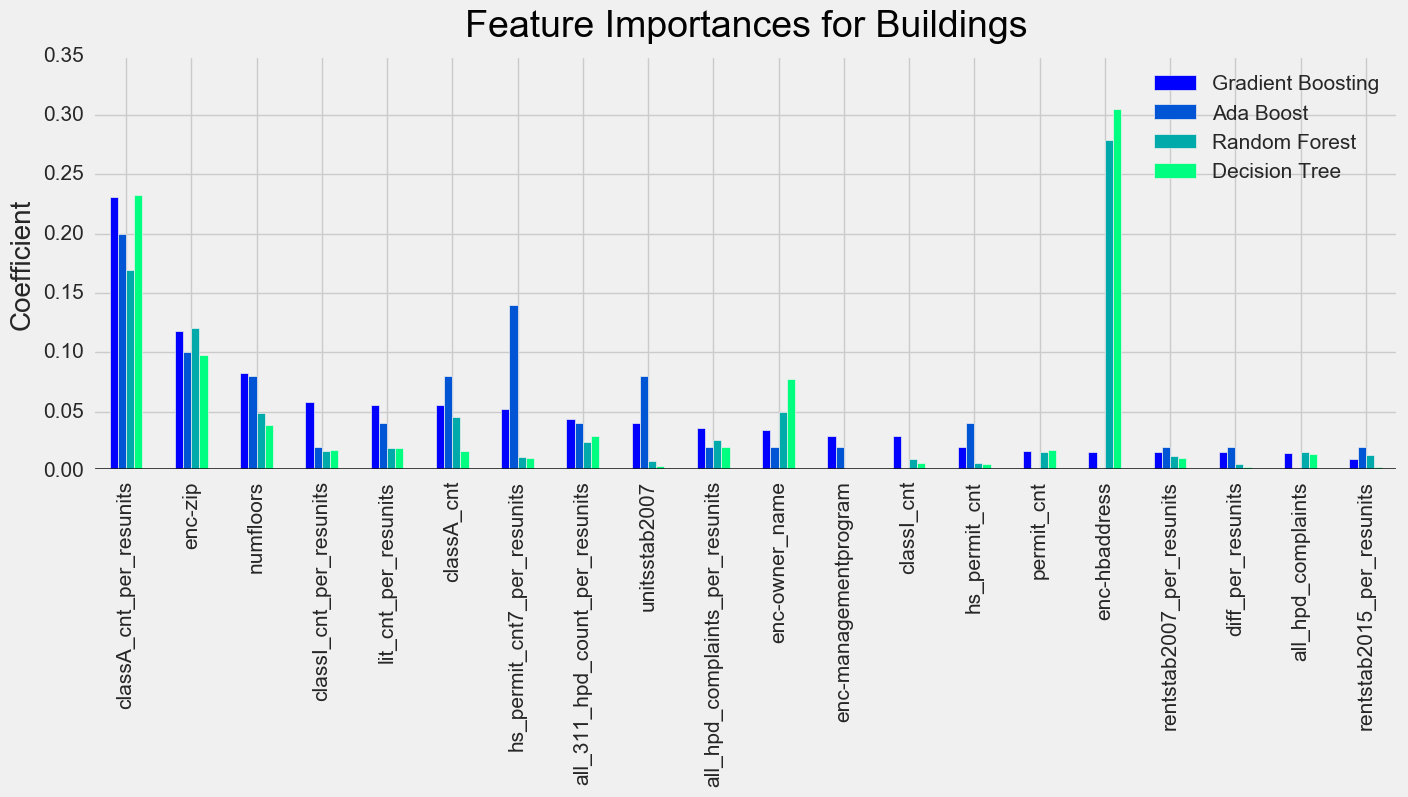

In [16]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-deep')


rf = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()

cv = StratifiedKFold(y_features, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_features, y_features, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_features, y_features)
abc.fit(X_features, y_features)
gbc.fit(X_features, y_features)
dtc.fit(X_features, y_features)

importances = pd.DataFrame(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              ),
                           index=X_features.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print display(importances.head(30))

importances[0:20].plot(kind='bar', figsize=(15,5), colormap='winter')


plt.title('Feature Importances for Buildings', fontsize = 27, y = 1.03, color='black')


plt.ylabel('Coefficient', fontsize = 20)
plt.yticks(fontsize = 15)

#plt.xlabel('Features', fontsize = 30)
plt.axhline(0, color='black')
plt.xticks(rotation=90, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [17]:
cols_to_keep = [
    'hs_permit_cnt',
    'all_311_hpd_count_per_resunits',
    'hs_permit_cnt7_per_resunits',
    'classA_cnt_per_resunits',
    'classI_cnt_per_resunits',
    'lit_cnt_per_resunits',
    'numfloors',
    'unitsstab2007',
    'classA_cnt',
    'enc-zip',
]

X_features = X_features[cols_to_keep]

In [18]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

cv = StratifiedKFold(y_features, n_folds=10, shuffle=True, random_state=41)

lg= LogisticRegression()
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50)
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)
abc = AdaBoostClassifier()
gbst = GradientBoostingClassifier()
bnb = BernoulliNB()
svc = SVC(kernel='linear',probability=True)


def score(model, name):
    s = cross_val_score(model, X_features, y_features, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))
        
score(dt,"Decision Tree")
score(lg, "Logistic Regression")
score(bdt, "Bagging Decision Tree")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(abc, "Ada Boost")
score(gbst, "Gradient Boosting")
score(bnb, "Bernoulli NB")
# score(svc, "SVC") # Significantly LONG run-time therefore, not recommended. 


Decision Tree Score:	0.72 ± 0.003
Logistic Regression Score:	0.776 ± 0.003
Bagging Decision Tree Score:	0.758 ± 0.003
Random Forest Score:	0.733 ± 0.004
Extra Trees Score:	0.727 ± 0.003
Ada Boost Score:	0.777 ± 0.003
Gradient Boosting Score:	0.783 ± 0.003
Bernoulli NB Score:	0.765 ± 0.003


In [22]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.33, random_state=16)


### Log Reg

In [24]:
from sklearn.grid_search import GridSearchCV

C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

lgm = GridSearchCV(lg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=10)
lgm_model=lgm.fit(X_train, y_train)

/Applications/anaconda/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
print lgm_model.best_score_
print lgm_model.best_params_
print lgm_model.best_estimator_

0.775199111139
{'penalty': 'l1', 'C': 0.01}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [26]:
y_lgm = lgm_model.predict_proba(X_test)[:,1]

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_lgm1 = lgm_model.predict(X_test)

print accuracy_score(y_test, y_lgm1)

print classification_report(y_test, y_lgm1)
print confusion_matrix(y_test,y_lgm1)

0.778112746131
             precision    recall  f1-score   support

        0.0       0.78      0.94      0.85     32715
        1.0       0.76      0.42      0.54     14719

avg / total       0.77      0.78      0.76     47434

[[30714  2001]
 [ 8524  6195]]


In [ ]:
mat = np.array(confusion_matrix(y_test,y_lgm1))

confusion = pd.DataFrame(mat, index=['No match','Match'],\
                     columns=['Pred no match','Pred match'])

plt.figure(figsize = (4.5,4.5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
# plt.title("Confusion Matrix", fontsize=20)

### gbst

In [ ]:
from sklearn.grid_search import GridSearchCV


params = {"max_depth": [3,5,10],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10,20],
          "min_samples_split": [2, 5, 7,10,20]
         } 


gbst = GridSearchCV(gbst, params, n_jobs=-1, cv=10)

gbst.fit(X_train,y_train)

In [ ]:
print gbst.best_score_
print gbst.best_params_
print gbst.best_estimator_


In [ ]:
y_gbst = gbst.predict_proba(X_test)[:,1]

In [ ]:
y_gbst1 = gbst.predict(X_test)
print accuracy_score(y_test, y_gbst1)
print classification_report(y_test, y_gbst1)
print confusion_matrix(y_test, y_gbst1)

In [ ]:
mat = np.array(confusion_matrix(y_test,y_gbst1))

confusion = pd.DataFrame(mat, index=['No match','Match'],\
                     columns=['Pred no match','Pred match'])

plt.figure(figsize = (4.5,4.5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
# plt.title("Confusion Matrix", fontsize=20)

In [ ]:
plt.style.use(['fivethirtyeight','bmh'])
plt.figure(figsize=(13,7))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_lgm)
#fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_cvm)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_gbst)

ROC_AUC = auc(fpr, tpr)
#ROC_AUC1 = auc(fpr1, tpr1)
ROC_AUC2 = auc(fpr2, tpr2)



plt.plot(fpr, tpr, label='Logistic ROC (AUC = %0.5f)' % ROC_AUC)
plt.plot(fpr2, tpr2, label='Grad Boosting ROC (AUC = %0.5f)' % ROC_AUC2)
#plt.plot(fpr1, tpr1, label='SVC ROC (AUC = %0.5f)' % ROC_AUC1)


plt.xlim([-0.007, 0.2])
plt.ylim([-0.007, 1.12])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=20)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=20)
l=plt.legend(loc='lower right', fontsize=15)
for text in l.get_texts():
    text.set_color("gray")

plt.title('ROC Curves -- Building Model', color="black", alpha=0.7,fontsize=20)
plt.show()



### PCA BELOW

In [335]:
x2 = X_features.values
y2 = y_features.values

import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics

xStand = StandardScaler().fit_transform(x2)
scaled = pd.DataFrame(xStand, columns=X_features.columns, index=None)
X = scaled

#scaled.hist(figsize=(20,10))
covMat1 = np.cov(X_features.T)
eigenValues, eigenVectors = np.linalg.eig(covMat1)
#print "Eigen vlues: ", eigenValues

eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
#print "EigenPairs:" ,eigenPairs

weight_2d_projection = np.hstack((eigenPairs[0][1].reshape(eigenVectors.shape[1],1),
                                  eigenPairs[1][1].reshape(eigenVectors.shape[1],1),
                                  eigenPairs[2][1].reshape(eigenVectors.shape[1],1)))

num_components = 10
pca = PCA(n_components = num_components)
pca.fit(X_features)
pca_df = pd.DataFrame(pca.fit_transform(X))

pca_vec = pca.components_

cumulvarExpl = pca.explained_variance_ratio_.cumsum()


In [337]:
X_features.describe()

,hs_permit_cnt,all_311_hpd_count_per_resunits,hs_permit_cnt7_per_resunits,classA_cnt_per_resunits,classI_cnt_per_resunits,lit_cnt_per_resunits,numfloors,unitsstab2007,classA_cnt,enc-zip
count,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000,143737.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.253,-0.250,-0.221,-0.385,-0.342,-0.285,-1.124,-0.096,-0.438,-2.119
25%,-0.253,-0.250,-0.221,-0.385,-0.342,-0.285,-0.525,-0.096,-0.438,-0.669
50%,-0.253,-0.250,-0.221,-0.385,-0.342,-0.285,-0.225,-0.096,-0.438,0.119
75%,-0.253,-0.127,-0.221,-0.023,-0.342,-0.285,0.075,-0.074,0.081,0.636
max,52.455,58.032,78.233,35.080,39.039,40.164,34.553,62.466,36.586,1.983


In [ ]:
plt.figure(figsize=(5,3))

component_number = range(num_components)

plt.scatter(component_number, cumulvarExpl, lw=4, color='blue')

plt.axhline(y=0, linewidth=5, color='blue', ls='dashed')
plt.axhline(y=100, linewidth=3, color='blue', ls='dashed')


ax = plt.gca()
ax.set_xlim([0,30])
ax.set_ylim([0,1])

ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

In [339]:
Z = X.dot(weight_2d_projection)

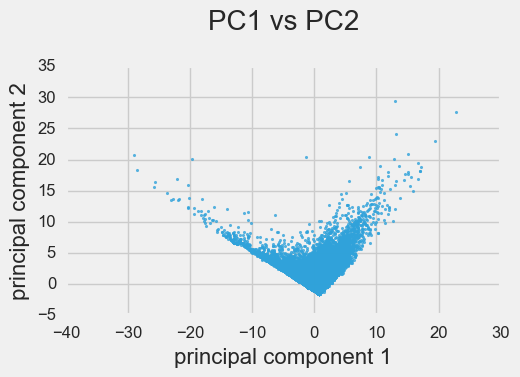

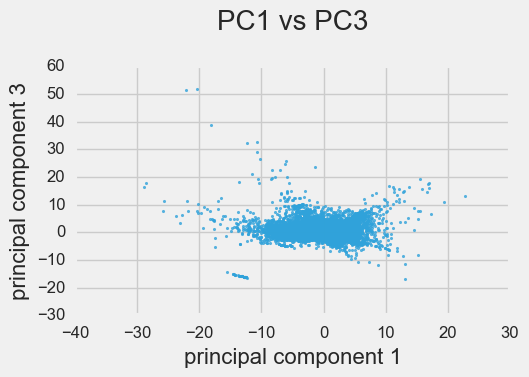

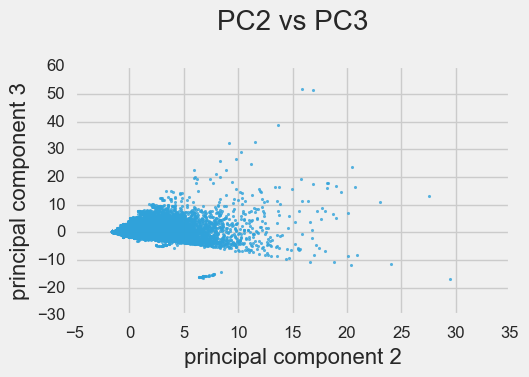

In [340]:
fig = plt.figure(figsize=(5,3))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':5}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

fig = plt.figure(figsize=(5,3))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,2],
                 fit_reg=False, scatter_kws={'s':5}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 3', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC3\n', fontsize=20)

plt.show()

fig = plt.figure(figsize=(5,3))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,1], Z.iloc[:,2],
                 fit_reg=False, scatter_kws={'s':5}, ax=ax)

ax.set_xlabel('principal component 2', fontsize=16)
ax.set_ylabel('principal component 3', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC2 vs PC3\n', fontsize=20)

plt.show()

In [341]:
pc_scaled = scaled.copy()
pc_scaled['PC1'] = Z.iloc[:,0]
pc_scaled['PC2'] = Z.iloc[:,1]
pc_scaled['PC3'] = Z.iloc[:,2]

pc_scaled = pd.melt(pc_scaled, id_vars=['PC1','PC2', 'PC3'])
pc_scaled.head(10)

,PC1,PC2,PC3,variable,value
0,-0.667,0.716,-0.945,hs_permit_cnt,-0.253
1,-12.012,6.841,1.439,hs_permit_cnt,12.413
2,3.255,7.336,-3.688,hs_permit_cnt,-0.253
3,-0.747,0.032,-0.455,hs_permit_cnt,-0.253
4,-18.266,11.162,7.583,hs_permit_cnt,30.800
5,-1.109,0.019,-0.567,hs_permit_cnt,-0.253
6,-1.561,0.339,0.318,hs_permit_cnt,0.156
7,-1.470,0.302,0.009,hs_permit_cnt,0.564
8,-12.870,7.961,5.255,hs_permit_cnt,20.585
9,-1.472,0.521,0.258,hs_permit_cnt,0.564
